<a href="https://colab.research.google.com/github/sumankanukollu/EVA_4_Assignments/blob/S_10_LRFinder_Misclassified_Cifar10/EVA_4_S9_Suman_Kanukollu_LRFinder_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Steps Summary

In [0]:
# 1. Mount google drive
# 2. Import all modules and libraries
# 3. Set the directory path of google drive
# 4. Set Device
# 5. Import all the functions
# 6. Load transformations
# 7. Load dataset
# 8. Load Classes
# 9. Display sample images
# 10. Load Resnet18 Model
# 11. Define Loss function and optimizer
# 12. Run train and test



**1. Mount google drive**




In [1]:
from google.colab import drive
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 2. Auto load the modified content
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload




**2.   Import all required modules**




In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torchvision import datasets,transforms

from torchsummary import summary

from tqdm import tqdm

import  matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.debugger import set_trace

import numpy as np
!pip install albumentations
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-9k7f4egn
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-9k7f4egn
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64574 sha256=fd453da0de4774fe70630d58d96caef8551a2179f8e4e5712195f3e74fefeb70
  Stored in directory: /tmp/pip-ephem-wheel-cache-o1ty65xa/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5


**3. Set the modules homepath and library path**

In [4]:
import os,sys
os.chdir('/content/drive/My Drive/pytorch_Framework_suman')
homepath = os.getcwd()
print('\n### Home Path is : {}'.format(homepath))
!ls
sys.path.append(os.path.join(homepath,'lib'))
print(sys.path)


### Home Path is : /content/drive/My Drive/pytorch_Framework_suman
data						  outputs
EVA-4-S9-Suman-Kanukollu-LRFinder_CIFAR_10.ipynb  resnet18_cifar10_main.ipynb
EVA-4-S9-Suman-Kanukollu-Main.ipynb		  sampleImages
lib						  utils
models
['/tensorflow-1.15.0/python3.6', '', '/env/python', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.6/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/pytorch_Framework_suman/lib']


**4. Set Device**

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
print(torch.cuda.is_available())

cuda
True


**5. Import All reusable modules**

In [0]:
from models import resnet
from lib.loadDataSet import dataSetFunctions
from utils.showimgs import utils_showimgs

**6. Load transformations**

In [0]:
dsObj = dataSetFunctions()
transform_train, transform_test = dsObj.albumentationTransformations()

In [8]:
import albumentations as A
dir(A.Rotate)
#A.RGBShift

['__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_get_target_function',
 '_to_dict',
 'add_targets',
 'apply',
 'apply_to_bbox',
 'apply_to_bboxes',
 'apply_to_keypoint',
 'apply_to_keypoints',
 'apply_to_mask',
 'apply_to_masks',
 'apply_with_params',
 'call_backup',
 'get_base_init_args',
 'get_class_fullname',
 'get_dict_with_id',
 'get_params',
 'get_params_dependent_on_targets',
 'get_transform_init_args',
 'get_transform_init_args_names',
 'set_deterministic',
 'target_dependence',
 'targets',
 'targets_as_params',
 'update_params']

**7. Load dataset**

In [9]:
(trainset,testset)          = dsObj.dataSet(transform=(transform_train, transform_test),name='cifar10')
(train_loader,test_loader)  = dsObj.dataLoader(trainDataset=trainset,testDataset=testset)


### Preparing dataset for the name : cifar10
Files already downloaded and verified
Files already downloaded and verified

### Loading data from dataset


**8. Load classes**

In [10]:
dsObj.dataSetClasses(trainset)

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

**9. Just get some random images from Train dataset and plot those**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


128
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
tensor([0, 3, 8, 5, 5, 2, 7, 4, 7, 0, 9, 7, 9, 1, 8, 3, 5, 6, 7, 6, 0, 0, 4, 9,
        3, 0, 2, 6, 2, 8, 5, 0, 5, 2, 2, 9, 2, 6, 9, 0, 6, 7, 7, 7, 8, 0, 5, 7,
        2, 2, 7, 1, 8, 9, 6, 4, 9, 7, 7, 1, 9, 1, 4, 9, 9, 5, 2, 0, 8, 1, 8, 2,
        0, 3, 5, 6, 8, 7, 1, 2, 6, 6, 3, 5, 4, 7, 5, 9, 6, 6, 2, 8, 2, 3, 5, 8,
        9, 9, 0, 3, 9, 4, 9, 9, 8, 3, 6, 0, 3, 1, 3, 6, 5, 9, 4, 2, 0, 9, 2, 0,
        4, 8, 5, 8, 4, 8, 8, 3])
  airplane        cat       ship        dog


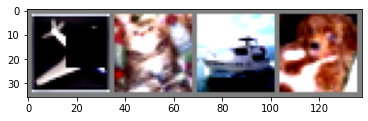

In [11]:
#from utils.showimgs import utils_showimgs
utObj = utils_showimgs()

utObj.getRandomTrainImgs(trainset,train_loader)

**10. Load Resnet18 model on to respective device (GPU or CPU) and print summary**

In [12]:
from models import resnet
print('Model is going to run on device : {}'.format(device))
model = resnet.ResNet18().to(device)
summary(model,(3,32,32))

Model is going to run on device : cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728


**11. Define loss function and optimizer**

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

#net = model
#criterion = nn.CrossEntropyLoss()
#criterion = nn.NLLLoss()
#optimizer = optim.Adam(model.parameters(), lr = 0.01)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)'''

**11.1. LR Finder**

In [14]:
!pip install torch-lr-finder -v --global-option="amp"

/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
Created temporary directory: /tmp/pip-ephem-wheel-cache-73562kus
Created temporary directory: /tmp/pip-req-tracker-dn5lydy_
Created requirements tracker '/tmp/pip-req-tracker-dn5lydy_'
Created temporary directory: /tmp/pip-install-5an7eh9q
Cleaning up...
Removed build tracker '/tmp/pip-req-tracker-dn5lydy_'


**11.1.2. LR Finder**


*   *Increases the learning rate in an exponential manner and computes the training loss for each learning rate*



  pip install torch-lr-finder -v --global-option="amp"


Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



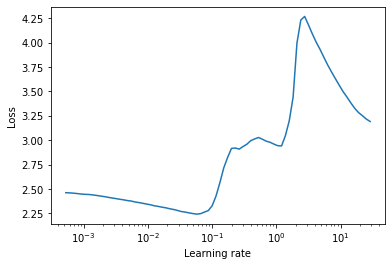

Min loss value is : 2.242870441667632 
Min LR value is   : 0.0001318257


In [15]:
from torch_lr_finder import LRFinder

model = model
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001,momentum=0.2)
#optimizer = optim.Adam(model.parameters(), lr=1e-7, weight_decay=1e-2)
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(train_loader, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

print('Min loss value is : {} \nMin LR value is   : {}'.format(min(lr_finder.history['loss']),format(min(lr_finder.history['lr']),'.10f')))



In [16]:
print('Min loss observed at index : {}'.format(lr_finder.history['loss'].index(min(lr_finder.history['loss']))))
print('so corresponding LR value at that index is : {}'.format(lr_finder.history['lr'][lr_finder.history['loss'].index(min(lr_finder.history['loss']))]))

Min loss observed at index : 44
so corresponding LR value at that index is : 0.05754399373371571


**12. Run Train and Test**

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.057544,momentum=0.9)

from lib import trainTestMethods
for epoch in range(5):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 0
 [================================================================>]  Step: 48ms | Tot: 29s656ms | Train >> Loss: 1.807 | Acc: 35.014% (17507/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s782ms | Test >> Loss: 1.367 | Acc: 49.790% (4979/10000) 79/79 

Epoch: 1
 [================================================================>]  Step: 44ms | Tot: 29s639ms | Train >> Loss: 1.373 | Acc: 49.808% (24904/50000) 391/391 
 [================================================================>]  Step: 11ms | Tot: 2s694ms | Test >> Loss: 1.232 | Acc: 55.280% (5528/10000) 79/79 

Epoch: 2
 [================================================================>]  Step: 49ms | Tot: 29s744ms | Train >> Loss: 1.155 | Acc: 58.444% (29222/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s724ms | Test >> Loss: 1.086 | Acc: 62.750% (6275/10000) 79/79 

Epoch: 3
 [=========================

In [18]:
for epoch in range(5,10):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 5
 [================================================================>]  Step: 46ms | Tot: 29s773ms | Train >> Loss: 0.799 | Acc: 71.852% (35926/50000) 391/391 
 [================================================================>]  Step: 11ms | Tot: 2s755ms | Test >> Loss: 0.607 | Acc: 79.510% (7951/10000) 79/79 

Epoch: 6
 [================================================================>]  Step: 49ms | Tot: 29s689ms | Train >> Loss: 0.724 | Acc: 74.742% (37371/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s737ms | Test >> Loss: 0.655 | Acc: 77.380% (7738/10000) 79/79 

Epoch: 7
 [================================================================>]  Step: 46ms | Tot: 29s734ms | Train >> Loss: 0.664 | Acc: 76.794% (38397/50000) 391/391 
 [================================================================>]  Step: 11ms | Tot: 2s666ms | Test >> Loss: 0.558 | Acc: 81.200% (8120/10000) 79/79 

Epoch: 8
 [=========================

In [19]:
for epoch in range(10,21):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 10
 [================================================================>]  Step: 46ms | Tot: 29s621ms | Train >> Loss: 0.544 | Acc: 80.858% (40429/50000) 391/391 
 [================================================================>]  Step: 9ms | Tot: 2s752ms | Test >> Loss: 0.473 | Acc: 84.430% (8443/10000) 79/79 

Epoch: 11
 [================================================================>]  Step: 48ms | Tot: 29s521ms | Train >> Loss: 0.507 | Acc: 82.270% (41135/50000) 391/391 
 [================================================================>]  Step: 13ms | Tot: 2s717ms | Test >> Loss: 0.644 | Acc: 79.860% (7986/10000) 79/79 

Epoch: 12
 [================================================================>]  Step: 46ms | Tot: 29s852ms | Train >> Loss: 0.472 | Acc: 83.430% (41715/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s740ms | Test >> Loss: 0.431 | Acc: 85.510% (8551/10000) 79/79 

Epoch: 13
 [======================

In [20]:
for epoch in range(21,31):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 21
 [================================================================>]  Step: 48ms | Tot: 29s814ms | Train >> Loss: 0.318 | Acc: 88.934% (44467/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s719ms | Test >> Loss: 0.385 | Acc: 88.080% (8808/10000) 79/79 

Epoch: 22
 [================================================================>]  Step: 46ms | Tot: 29s642ms | Train >> Loss: 0.299 | Acc: 89.596% (44798/50000) 391/391 
 [================================================================>]  Step: 11ms | Tot: 2s698ms | Test >> Loss: 0.418 | Acc: 87.020% (8702/10000) 79/79 

Epoch: 23
 [================================================================>]  Step: 44ms | Tot: 29s708ms | Train >> Loss: 0.295 | Acc: 89.852% (44926/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s708ms | Test >> Loss: 0.404 | Acc: 87.930% (8793/10000) 79/79 

Epoch: 24
 [=====================

In [21]:
for epoch in range(31,41):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 31
 [================================================================>]  Step: 44ms | Tot: 29s517ms | Train >> Loss: 0.229 | Acc: 92.096% (46048/50000) 391/391 
 [================================================================>]  Step: 10ms | Tot: 2s709ms | Test >> Loss: 0.351 | Acc: 89.650% (8965/10000) 79/79 

Epoch: 32
 [================================================================>]  Step: 48ms | Tot: 29s672ms | Train >> Loss: 0.225 | Acc: 92.220% (46110/50000) 391/391 
 [================================================================>]  Step: 12ms | Tot: 2s653ms | Test >> Loss: 0.384 | Acc: 88.870% (8887/10000) 79/79 

Epoch: 33
 [================================================================>]  Step: 44ms | Tot: 29s379ms | Train >> Loss: 0.214 | Acc: 92.588% (46294/50000) 391/391 
 [================================================================>]  Step: 12ms | Tot: 2s634ms | Test >> Loss: 0.350 | Acc: 89.940% (8994/10000) 79/79 

Epoch: 34
 [=====================

In [22]:
for epoch in range(41,55):
    trainTestMethods.train(model, train_loader, device, optimizer, criterion, epoch)
    trainTestMethods.test(model, test_loader, device, criterion, epoch)


Epoch: 41
 [================================================================>]  Step: 46ms | Tot: 29s597ms | Train >> Loss: 0.180 | Acc: 93.818% (46909/50000) 391/391 
 [================================================================>]  Step: 9ms | Tot: 2s673ms | Test >> Loss: 0.373 | Acc: 90.010% (9001/10000) 79/79 

Epoch: 42
 [================================================================>]  Step: 46ms | Tot: 29s466ms | Train >> Loss: 0.181 | Acc: 93.702% (46851/50000) 391/391 
 [================================================================>]  Step: 14ms | Tot: 2s611ms | Test >> Loss: 0.374 | Acc: 89.920% (8992/10000) 79/79 

Epoch: 43
 [================================================================>]  Step: 46ms | Tot: 29s534ms | Train >> Loss: 0.174 | Acc: 93.908% (46954/50000) 391/391 
 [================================================================>]  Step: 9ms | Tot: 2s668ms | Test >> Loss: 0.354 | Acc: 90.030% (9003/10000) 79/79 

Epoch: 44
 [=======================

**13. Grad-CAM**

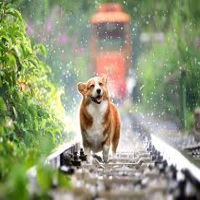

In [23]:
import os
sys.path.append(os.path.join(homepath,'sampleImages'))
imagename = 'dog4.jpg'
pil_img = utObj.loadImage(os.path.join(homepath,'sampleImages'), imagename)
pil_img.resize(size=(200,200))

In [0]:
from lib.gradCam.gradcam import GradCAM, GradCAMpp
from lib.gradCam.gradcam_utils import Normalize, visualize_cam

In [25]:
normalizer = Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
torch_img = torch.from_numpy(np.asarray(pil_img)).permute(2, 0, 1).unsqueeze(0).float().div(255).cuda()
torch_img = F.upsample(torch_img, size=(32, 32), mode='bilinear', align_corners=False)
normed_torch_img = normalizer(torch_img)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [27]:
resnet = model
resnet.eval(), resnet.cuda();
model_dict = dict(type='resnet', arch=resnet, layer_name='layer4', input_size=(32, 32))
gradcam = GradCAM(model_dict, True)
gradcampp = GradCAMpp(model_dict)

saliency_map size : torch.Size([4, 4])


In [28]:
mask, _ = gradcam(normed_torch_img)
heatmap, result = visualize_cam(mask.cpu(), torch_img.cpu())

mask_pp, _ = gradcampp(normed_torch_img)
heatmap_pp, result_pp = visualize_cam(mask_pp.cpu(), torch_img.squeeze().cpu())

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [0]:
from torchvision.utils import make_grid
imgs = []
imgs.append(torch.stack([torch_img.squeeze().cpu(), heatmap, heatmap_pp, result, result_pp], 0))
imgs = make_grid(torch.cat(imgs, 0), nrow=5)

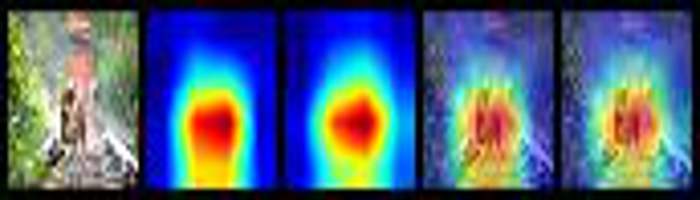

In [30]:
pilimg = utObj.saveimage(images = imgs, outputdirectory=os.path.join(homepath,'outputs'), imagename=imagename.split('.')[0]+'_gradCam.jpg')

pilimg.resize((700,200))